In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('X_sm_100features.csv', index_col=False)
X = X.drop(columns=['internalTaxonId', 'Unnamed: 0'])
y = pd.read_csv('y_sm_100features.csv', index_col=False)
y = y[["redlistCategory"]]

print("X shape: ", X.shape, "y shape: ", y.shape)

X shape:  (127986, 100) y shape:  (127986, 1)


In [3]:
y.redlistCategory.value_counts()

4    21331
0    21331
2    21331
1    21331
3    21331
5    21331
Name: redlistCategory, dtype: int64

In [4]:
'''y = y.replace({
    0: "Least Concern",
    1: "Near Threatened",
    2: "Vulnerable",
    3: "Endangered",
    4: "Critically Endangered",
    5: "Extinct in the Wild",
    6: "Extinct",
})'''

'y = y.replace({\n    0: "Least Concern",\n    1: "Near Threatened",\n    2: "Vulnerable",\n    3: "Endangered",\n    4: "Critically Endangered",\n    5: "Extinct in the Wild",\n    6: "Extinct",\n})'

In [5]:
#y = pd.get_dummies(y.redlistCategory)
#y.head()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
y_test.head()

,redlistCategory
23857,2
26688,0
119666,5
121623,5
11098,0


In [8]:
#set random seed
tf.random.set_seed(42)
#create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(70,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(6,activation="softmax")
])
#compile the model
model_12.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20) )
#fit the model
epoch_num = 14
fit_lr_history =model_12.fit(
   X_train,
   y_train,
   epochs=epoch_num,
   callbacks=[lr_scheduler],
   validation_data=(X_test,y_test),
   verbose=1)

Epoch 1/14
2680/2680 [==============================] - 7s 2ms/step - loss: 1.1161 - accuracy: 0.5305 - val_loss: 1.0350 - val_accuracy: 0.5640 - lr: 0.0010
Epoch 2/14
2680/2680 [==============================] - 7s 3ms/step - loss: 0.9833 - accuracy: 0.5917 - val_loss: 0.9551 - val_accuracy: 0.6028 - lr: 0.0011
Epoch 3/14
2680/2680 [==============================] - 7s 3ms/step - loss: 0.9311 - accuracy: 0.6155 - val_loss: 0.9284 - val_accuracy: 0.6218 - lr: 0.0013
Epoch 4/14
2680/2680 [==============================] - 6s 2ms/step - loss: 0.8948 - accuracy: 0.6329 - val_loss: 0.9349 - val_accuracy: 0.6199 - lr: 0.0014
Epoch 5/14
2680/2680 [==============================] - 8s 3ms/step - loss: 0.8643 - accuracy: 0.6478 - val_loss: 0.8849 - val_accuracy: 0.6423 - lr: 0.0016
Epoch 6/14
2680/2680 [==============================] - 7s 2ms/step - loss: 0.8460 - accuracy: 0.6552 - val_loss: 0.8834 - val_accuracy: 0.6467 - lr: 0.0018
Epoch 7/14
2680/2680 [==============================] - 6s

In [9]:
a = model_12.evaluate(X_test,y_test)

1320/1320 [==============================] - 2s 1ms/step - loss: 0.8670 - accuracy: 0.6598


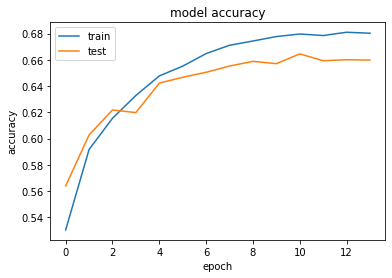

In [10]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
y_pred = model_12.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]


1320/1320 [==============================] - 2s 1ms/step


In [13]:
from sklearn.metrics import confusion_matrix, classification_report


In [15]:
print(classification_report(y_test, y_pred,target_names=[str(i) for i in range(6)] ))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7144
           1       0.62      0.71      0.66      6993
           2       0.45      0.48      0.46      7041
           3       0.51      0.37      0.43      7020
           4       0.61      0.60      0.60      7082
           5       0.92      0.98      0.95      6956

    accuracy                           0.66     42236
   macro avg       0.65      0.66      0.65     42236
weighted avg       0.65      0.66      0.65     42236



Text(0.5, 1.0, 'Finding the ideal Learning Rate')

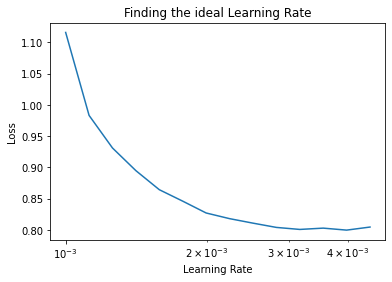

In [16]:
import matplotlib.pyplot as plt

lrs =1e-3 *(10**(tf.range(epoch_num)/20))
plt.semilogx(lrs,fit_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

[[5842  379  532  197  120   74]
 [ 349 4984 1030  236  307   87]
 [ 458 1056 3360 1032  840  295]
 [ 298 1016 1575 2589 1486   56]
 [ 190  619  928  996 4245  104]
 [  12   13   77    6    0 6848]]


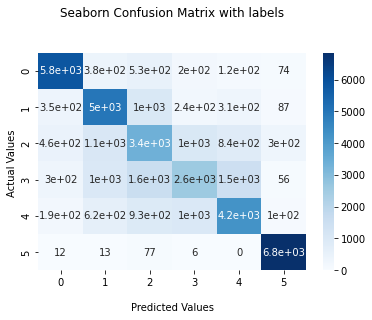

In [17]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
#y_pred
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

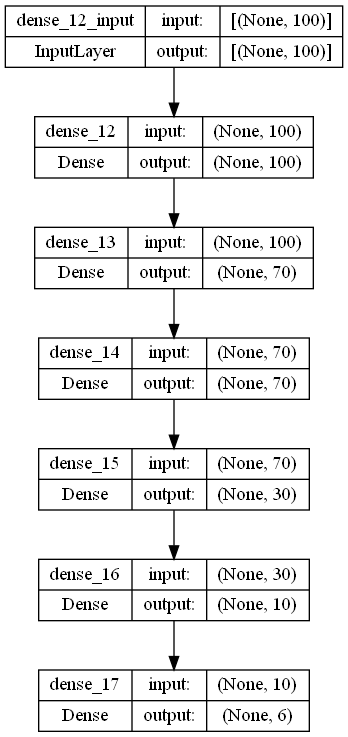

In [ ]:
#from tensorflow.keras.utils import plot_model
#see the inputs and outputs
#plot_model(model_12,show_shapes=True)